In [3]:
# Importing modules
import pandas as pd
import os

# import os)# Read data into papers
# os.chdir('.')
papers = pd.read_csv('../../../webscrape/twitter/twitter_oldtweet.csv')
# Print head
papers.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,Feeling
0,0,wchacon,2022-07-05 19:58:34+00:00,0,dlvr.it,"Asia's Largest, Prized Hackathon Organised by ...",Positive
1,1,CaritauInfo,2022-07-05 19:05:01+00:00,0,WordPress.com,Hackathon Terbesar dan Berharga di Asia Disele...,Neutral
2,2,InvestorIdeas,2022-07-05 16:10:02+00:00,0,dlvr.it,"Asia's Largest, Prized Hackathon Organised by ...",Positive
3,3,delete75522330,2022-07-05 15:05:32+00:00,0,Twitter Web App,"Asia's Largest, Prized Hackathon Organised by ...",Positive
4,4,xiaojiuwo8,2022-07-05 14:07:29+00:00,0,Twitter Web App,"Asia's Largest, Prized Hackathon Organised by ...",Positive


In [2]:
cleantweets = papers.drop(columns=['Date Created', 'Source of Tweet', 'Feeling', 'Number of Likes', 'Unnamed: 0'], axis=1)
cleantweets.head()

,User,Tweet
0,wchacon,"Asia's Largest, Prized Hackathon Organised by ..."
1,CaritauInfo,Hackathon Terbesar dan Berharga di Asia Disele...
2,InvestorIdeas,"Asia's Largest, Prized Hackathon Organised by ..."
3,delete75522330,"Asia's Largest, Prized Hackathon Organised by ..."
4,xiaojiuwo8,"Asia's Largest, Prized Hackathon Organised by ..."


In [3]:
# Load the regular expression library
import re# Remove punctuation
cleantweets['paper_text_processed'] = \
cleantweets['Tweet'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase
cleantweets['paper_text_processed'] = \
cleantweets['Tweet'].map(lambda x: re.sub('https\S+', '', x))# remove urls

# Convert & to and
# cleantweets['paper_text_processed'] = \
# cleantweets['Tweet'].map(lambda x: re.sub('&\S+', 'and', x))

cleantweets['paper_text_processed'] = \
cleantweets['paper_text_processed'].map(lambda x: x.lower())# Print out the first rows of papers
cleantweets['paper_text_processed'].head()

0    asia's largest, prized hackathon organised by ...
1    hackathon terbesar dan berharga di asia disele...
2    asia's largest, prized hackathon organised by ...
3    asia's largest, prized hackathon organised by ...
4    asia's largest, prized hackathon organised by ...
Name: paper_text_processed, dtype: object

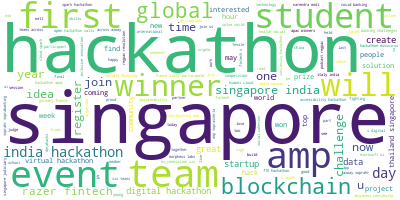

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(cleantweets['paper_text_processed'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [6]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words]for doc in texts]
data = cleantweets.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['asia', 'largest', 'prized', 'hackathon', 'organised', 'morpheus', 'labs', 'blockchain', 'association', 'singapore', 'bas', 'benzinga']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/woodpecker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(data_words)# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [8]:
from pprint import pprint# number of topics
num_topics = 10# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.039*"hackathon" + 0.032*"singapore" + 0.006*"mendix" + 0.005*"amp" + '
  '0.005*"time" + 0.005*"part" + 0.005*"community" + 0.005*"asia" + '
  '0.004*"startup" + 0.004*"last"'),
 (1,
  '0.026*"singapore" + 0.025*"hackathon" + 0.008*"first" + 0.005*"swsg" + '
  '0.005*"th" + 0.005*"asean" + 0.004*"love" + 0.004*"participating" + '
  '0.004*"tron" + 0.004*"event"'),
 (2,
  '0.058*"hackathon" + 0.058*"singapore" + 0.009*"india" + 0.006*"fintech" + '
  '0.006*"innovation" + 0.006*"startups" + 0.006*"winners" + 0.006*"cloud" + '
  '0.005*"pm" + 0.005*"blockchain"'),
 (3,
  '0.045*"singapore" + 0.039*"hackathon" + 0.010*"amp" + 0.007*"challenge" + '
  '0.006*"global" + 0.006*"winners" + 0.005*"inclusive" + 0.005*"july" + '
  '0.004*"philippines" + 0.004*"asia"'),
 (4,
  '0.045*"singapore" + 0.043*"hackathon" + 0.015*"amp" + 0.010*"fintech" + '
  '0.007*"team" + 0.006*"join" + 0.006*"covid" + 0.005*"us" + 0.005*"visit" + '
  '0.005*"event"'),
 (5,
  '0.037*"hackathon" + 0.034*"singa

In [10]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))# # this is a bit time consuming - make the if statement True

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.022568 -0.113797       1        1  24.480742
8      0.083622 -0.036175       2        1  15.325919
4      0.062115  0.022137       3        1  10.432853
9     -0.070732 -0.062884       4        1   9.999687
3     -0.016381 -0.019174       5        1   9.817884
7     -0.066721  0.004219       6        1   8.956706
5      0.095152  0.046280       7        1   8.326802
0     -0.068969  0.028953       8        1   5.740974
6     -0.014094  0.063800       9        1   3.777557
1     -0.026559  0.066642      10        1   3.140877, topic_info=           Term        Freq       Total Category  logprob  loglift
5     hackathon  446.000000  446.000000  Default  30.0000  30.0000
35          amp   64.000000   64.000000  Default  29.0000  29.0000
11    singapore  441.000000  441.000000  Default  28.0000  28.0000
855     fintech   45.000000   45.000000  Default  27.0000  27.0000
144       first   37.000000   37.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
125       would    0.682714    7.210447  Topic10  -6.0771   1.1035
1292      bring    0.623353    2.843332  Topic10  -6.1681   1.9430
597       india    0.767582   58.074964  Topic10  -5.9599  -0.8656
1129    college    0.638229    5.028874  Topic10  -6.1445   1.3964
99         join    0.646812   30.330565  Topic10  -6.1311  -0.3872

[700 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1811      2  0.836750   abhayjere
320       2  0.140566  accelerate
320       4  0.281132  accelerate
320       5  0.421698  accelerate
320       6  0.140566  accelerate
...     ...       ...         ...
354       5  0.041267       youth
354       7  0.082533       youth
354       9  0.041267       youth
518       6  0.451415     youtube
2573      4  0.645172         に参加

[1418 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 5, 10, 4, 8, 6, 1, 7, 2])